# Prirejanja v dvodelnih grafih

Poiščimo maksimalno prirejanje v neuteženem dvodelnem grafu.

In [1]:
G1 = Graph([(1, 6), (1, 9), (2, 6), (3, 8), (4, 7), (5, 6), (5, 8), (5, 10)])
G1.matching()

[(1, 9, None), (2, 6, None), (3, 8, None), (4, 7, None), (5, 10, None)]

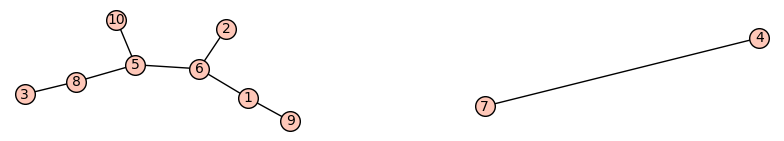

In [2]:
G1.plot()

Z matriko `M` podamo uteži na povezavah v uteženem polnem dvodelnem grafu. Poiskali bomo najtežje popolno prirejanje.

In [3]:
M = Matrix([[58, 60, 57, 60],
            [66, 68, 65, 66],
            [56, 57, 55, 54],
            [51, 52, 53, 51]])
G2 = Graph([(('r', i), ('c', j), w) for i, r in enumerate(M) for j, w in enumerate(r)])
G2.matching(use_edge_labels=True)

[(('c', 1), ('r', 1), 68),
 (('c', 0), ('r', 2), 56),
 (('c', 3), ('r', 0), 60),
 (('c', 2), ('r', 3), 53)]

Najlažje popolno prirejanje v dvodelnem grafu bomo poiskali s pomočjo celoštevilskega linearnega programiranja.

In [4]:
p = MixedIntegerLinearProgram(maximization=False)
x = p.new_variable(binary=True)
p.set_objective(sum(x[i, j]*w for i, r in enumerate(M) for j, w in enumerate(r)))
for i in range(M.ncols()):
    p.add_constraint(sum(x[i, j] for j in range(M.nrows())) == 1)
    p.add_constraint(sum(x[j, i] for j in range(M.nrows())) == 1)
p.solve()

229.0

In [5]:
{k: M[k] for k, v in p.get_values(x).items() if v == 1}

{(0, 0): 58, (1, 2): 65, (2, 3): 54, (3, 1): 52}

# Pretoki in prerezi

Podajmo usmerjen graf z uteženimi povezavami.

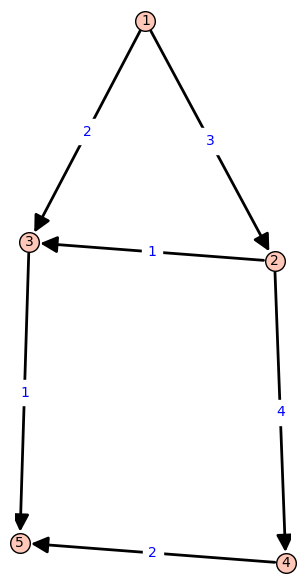

In [6]:
G3 = DiGraph([(1, 2, 3), (1, 3, 2), (2, 3, 1), (2, 4, 4), (3, 5, 1), (4, 5, 2)])
G3.plot(edge_labels=True, save_pos=True)

Poiščimo največji pretok od vozlišča 1 do vozlišča 5.

In [7]:
G3.flow(1, 5)

3

Zahtevamo lahko tudi, naj nam metoda `flow` vrne graf, ki predstavlja največji pretok.

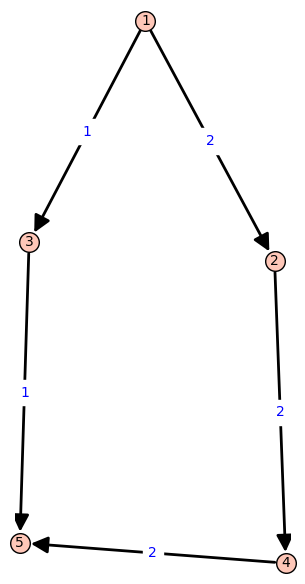

In [8]:
f, F = G3.flow(1, 5, value_only=False)
F.plot(edge_labels=True)

Poiščimo še minimalni prerez - to je ravno množica zasičenih povezav, katerih začetno vozlišče je po nezasičenih povezavah dosegljivo iz izvora.

In [9]:
cut = [(u, v) for u, v, w in G3.edges() if F.has_edge(u, v) and F.edge_label(u, v) == w]
H = G3.copy()
H.delete_edges(cut)
S = H.connected_component_containing_vertex(1)
min_cut = [(u, v, G3.edge_label(u, v)) for u, v in cut if u in S]
min_cut

[(3, 5, 1), (4, 5, 2)]